# ARTIFICIAL NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration and Preprocessing

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\18 Neural networks\Alphabets_data.csv')

In [3]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data.shape

(20000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
data['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [7]:
## from data info it is clear that there are no null values, letter is the target column and remaining columns are features

In [8]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
data.duplicated().any()

True

In [10]:
data[data.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().any()

False

In [13]:
## split target and features
target1=data[['letter']]
features1=data.drop('letter',axis=1)

<Axes: >

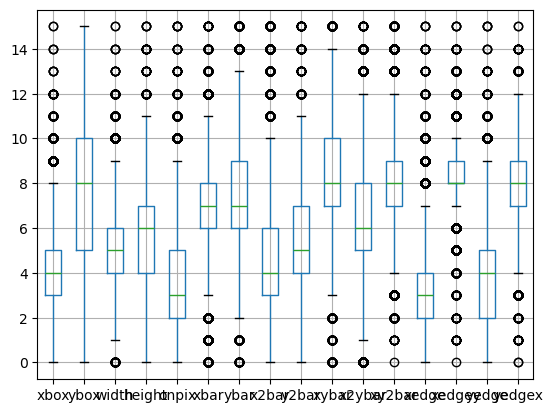

In [14]:
features1.boxplot()

In [15]:
features1.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [16]:
## features normalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
features=pd.DataFrame(min_max.fit_transform(features1),columns=features1.columns)

In [17]:
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000
18664,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
18665,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
18666,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667


### Model Implementation

In [18]:
!pip install keras

In [19]:
!pip install tensorflow

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
import keras
import tensorflow as tf

In [22]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam,Adagrad,SGD
from tensorflow.keras.utils import plot_model

In [23]:
## use label encoder to convert target column to numerical

In [24]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
target=pd.DataFrame(lab_enc.fit_transform(target1),columns=target1.columns)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
target

,letter
0,19
1,8
2,3
3,13
4,6
...,...
18663,19
18664,3
18665,2
18666,19


In [27]:
print(features.shape)
print(target.shape)

(18668, 16)
(18668, 1)


In [28]:
## train test split

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [30]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=50)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 16)
(3734, 16)
(14934, 1)
(3734, 1)


In [32]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=4)

In [33]:
## since we have 26 classes we must have 26 neurons in output layer
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [34]:
## Model building

In [35]:
epochs=200
batch_size=1000
n_classes=26
model=Sequential()
model.add(Dense(36,activation='relu',input_shape=(16,)))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 36)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │             962 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,574 (6.15 KB)

 Trainable params: 1,574 (6.15 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
## model compile

In [37]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
## model validation

In [39]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.0399 - loss: 3.2570 - val_accuracy: 0.0554 - val_loss: 3.2310
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0573 - loss: 3.2242 - val_accuracy: 0.0750 - val_loss: 3.2086
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0853 - loss: 3.2014 - val_accuracy: 0.1044 - val_loss: 3.1865
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1228 - loss: 3.1776 - val_accuracy: 0.1465 - val_loss: 3.1609
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1596 - loss: 3.1517 - val_accuracy: 0.1928 - val_loss: 3.1361
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1993 - loss: 3.1263 - val_accuracy: 0.2177 - val_loss: 3.1107
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2233 - loss: 3.1005 - val_accuracy: 0.2346 - val_loss: 3.0835
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2378 - loss: 3.0732 - val_accuracy: 0.2566 

In [42]:
## training accuracy is 74% and testing accuracy is 72%

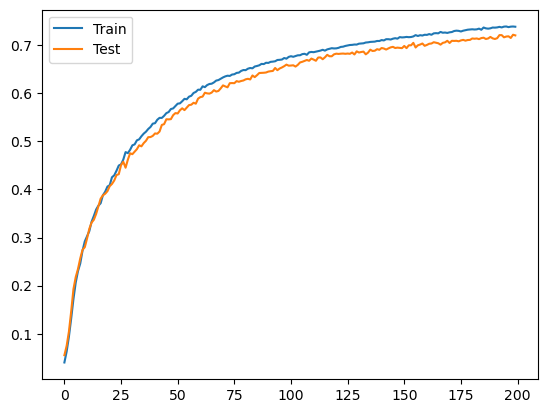

In [43]:
plt.plot(range(200),history.history['accuracy'],label='Train')
plt.plot(range(200),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')
plt.show();

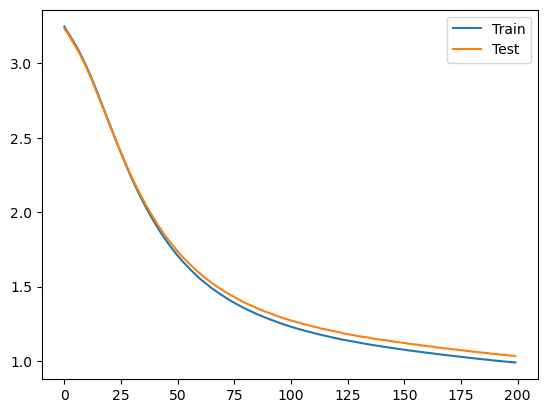

In [44]:
plt.plot(range(200),history.history['loss'],label='Train')
plt.plot(range(200),history.history['val_loss'],label='Test')
plt.legend(loc='best')
plt.show();

In [45]:
## calculating predicted value
y_pred=model.predict(x_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [46]:
y_pred[10]

array([2.4804546e-04, 1.3772714e-02, 8.0101401e-02, 5.0849761e-03,
       4.3742517e-03, 9.2918453e-05, 4.4666779e-01, 1.1903934e-02,
       3.3707151e-04, 2.5253001e-04, 3.8875802e-03, 5.1855696e-03,
       2.1508544e-05, 1.8027349e-05, 9.1878034e-02, 1.1046765e-04,
       3.1339160e-01, 5.9727500e-03, 4.7038971e-03, 6.7413278e-04,
       9.1514643e-03, 2.4279414e-04, 1.8484160e-07, 1.8862811e-03,
       2.5358539e-05, 1.4779378e-05], dtype=float32)

In [47]:
np.argmax(y_pred[10])

6

In [48]:
act=[]
for i in range(len(y_test)):
    act.append(np.argmax(y_test[i]))
print(act)

[11, 1, 19, 6, 21, 22, 21, 2, 18, 25, 16, 0, 14, 18, 16, 25, 25, 7, 25, 18, 14, 14, 24, 18, 4, 16, 3, 3, 5, 12, 0, 3, 6, 3, 20, 9, 7, 8, 14, 24, 17, 15, 21, 7, 15, 6, 5, 24, 4, 0, 0, 6, 1, 21, 20, 20, 1, 12, 2, 22, 21, 7, 3, 20, 10, 24, 7, 20, 0, 0, 1, 3, 7, 6, 24, 24, 25, 10, 14, 24, 21, 10, 6, 16, 3, 13, 0, 17, 8, 15, 11, 17, 3, 14, 20, 16, 20, 4, 3, 11, 18, 4, 7, 4, 6, 2, 20, 16, 8, 15, 3, 6, 7, 6, 7, 21, 15, 18, 1, 4, 6, 24, 13, 17, 25, 24, 9, 7, 20, 1, 14, 18, 3, 24, 21, 12, 3, 3, 25, 18, 15, 3, 7, 4, 25, 22, 2, 16, 22, 23, 19, 24, 16, 13, 14, 2, 7, 18, 24, 1, 11, 9, 7, 13, 24, 0, 15, 16, 4, 18, 24, 2, 15, 12, 18, 4, 8, 25, 3, 1, 14, 18, 4, 24, 10, 10, 8, 6, 25, 20, 13, 14, 24, 19, 13, 7, 4, 14, 7, 24, 19, 13, 14, 15, 8, 11, 7, 12, 5, 13, 23, 13, 13, 22, 9, 9, 20, 16, 19, 19, 24, 14, 21, 24, 17, 4, 8, 19, 9, 24, 1, 16, 18, 3, 3, 13, 20, 23, 4, 12, 8, 13, 11, 10, 9, 25, 13, 18, 7, 17, 19, 20, 12, 25, 24, 17, 3, 13, 16, 4, 21, 4, 11, 23, 11, 23, 19, 0, 14, 14, 2, 21, 0, 15, 13, 1, 2

In [49]:
pred=[]
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print(pred)

[16, 1, 24, 6, 21, 22, 21, 2, 11, 25, 6, 0, 3, 16, 14, 25, 25, 7, 25, 18, 14, 14, 24, 18, 4, 16, 15, 3, 15, 12, 16, 3, 1, 3, 20, 9, 1, 8, 14, 24, 23, 5, 21, 14, 15, 16, 5, 24, 4, 0, 0, 2, 1, 21, 20, 22, 1, 12, 5, 22, 13, 16, 17, 20, 10, 24, 10, 20, 10, 0, 1, 3, 7, 16, 24, 24, 25, 10, 14, 24, 21, 17, 6, 16, 3, 12, 0, 17, 8, 15, 23, 10, 13, 14, 20, 16, 20, 4, 17, 23, 11, 8, 17, 4, 6, 2, 20, 16, 23, 15, 3, 2, 20, 2, 7, 21, 15, 25, 16, 4, 2, 24, 13, 17, 9, 24, 9, 7, 20, 1, 22, 1, 17, 24, 21, 22, 9, 3, 25, 18, 15, 3, 7, 2, 25, 12, 4, 16, 12, 23, 19, 19, 24, 13, 20, 4, 1, 25, 24, 1, 6, 9, 7, 13, 24, 0, 15, 16, 4, 25, 24, 6, 15, 12, 1, 4, 24, 25, 14, 1, 14, 18, 4, 24, 10, 10, 8, 17, 18, 20, 14, 12, 24, 5, 13, 6, 5, 14, 7, 24, 19, 13, 14, 15, 8, 11, 7, 12, 5, 13, 23, 13, 13, 12, 9, 9, 20, 16, 19, 19, 24, 14, 21, 24, 17, 4, 23, 19, 9, 12, 1, 16, 18, 3, 3, 13, 20, 23, 16, 12, 15, 13, 11, 10, 8, 18, 13, 14, 10, 17, 19, 20, 12, 4, 24, 23, 3, 14, 11, 16, 21, 4, 11, 23, 11, 23, 19, 0, 14, 14, 4, 21,

In [50]:
accuracy_score(act,pred)

0.7201392608462774

In [51]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       139
           1       0.62      0.77      0.69       132
           2       0.64      0.66      0.65       145
           3       0.75      0.75      0.75       168
           4       0.74      0.80      0.77       163
           5       0.70      0.66      0.68       137
           6       0.62      0.43      0.51       168
           7       0.61      0.49      0.54       145
           8       0.75      0.64      0.69        97
           9       0.80      0.73      0.76       150
          10       0.61      0.68      0.64       146
          11       0.83      0.71      0.76       129
          12       0.84      0.83      0.83       140
          13       0.87      0.77      0.82       163
          14       0.64      0.78      0.70       143
          15       0.81      0.77      0.79       145
          16       0.59      0.72      0.65       144
          17       0.62    

In [52]:
## Model Tuning

In [57]:
epochs=200
batch_size=1000
n_classes=26
model1=Sequential()
model1.add(Dense(40,activation='relu',input_shape=(16,)))
model1.add(Dense(40,activation='relu'))
model1.add(Dense(n_classes,activation='softmax'))
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 40)                  │             680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │           1,066 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,386 (13.23 KB)

 Trainable params: 3,386 (13.23 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model1.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
history1=model1.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1882 - loss: 3.1198 - val_accuracy: 0.1893 - val_loss: 3.0763
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1963 - loss: 3.0483 - val_accuracy: 0.2046 - val_loss: 2.9896
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2097 - loss: 2.9575 - val_accuracy: 0.2231 - val_loss: 2.8814
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2351 - loss: 2.8451 - val_accuracy: 0.2587 - val_loss: 2.7560
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2637 - loss: 2.7141 - val_accuracy: 0.3029 - val_loss: 2.6179
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3236 - loss: 2.5843 - val_accuracy: 0.3345 - val_loss: 2.4846
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3473 - loss: 2.4429 - val_accuracy: 0.3798 - val_loss: 2.3581
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3905 - loss: 2.3189 - val_accuracy: 0.3

In [61]:
## using two hidden layers we achieved 81% accuracy in training and 80% in testing.

In [62]:
## changing activation functions

In [63]:
epochs=200
batch_size=500
n_classes=26
model2=Sequential()
model2.add(Dense(40,activation='tanh',input_shape=(16,)))
model2.add(Dense(40,activation='tanh'))
model2.add(Dense(n_classes,activation='softmax'))
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 40)                  │             680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 26)                  │           1,066 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,386 (13.23 KB)

 Trainable params: 3,386 (13.23 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model2.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
history2=model2.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0474 - loss: 3.2473 - val_accuracy: 0.1508 - val_loss: 3.1332
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1734 - loss: 3.0930 - val_accuracy: 0.2528 - val_loss: 2.9712
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2748 - loss: 2.9129 - val_accuracy: 0.3131 - val_loss: 2.7534
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3347 - loss: 2.6770 - val_accuracy: 0.3736 - val_loss: 2.5115
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4098 - loss: 2.4338 - val_accuracy: 0.4569 - val_loss: 2.2823
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4823 - loss: 2.2041 - val_accuracy: 0.4954 - val_loss: 2.0791
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5245 - loss: 2.0030 - val_accuracy: 0.5201 - val_loss: 1.9098
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5474 - loss: 1.8418 - val_accuracy: 0.5495 - 

In [66]:
## using tanh activation, two hidden layers and Adam optimizer with batch size 500, we are able to achieve 90% accuracy in training and 87% in testing

In [69]:
## so far model2 is the best

In [70]:
y_pred=model2.predict(x_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [72]:
pred=[]
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print(pred)

[11, 1, 19, 6, 21, 22, 21, 2, 18, 25, 6, 0, 14, 11, 16, 25, 25, 7, 25, 18, 14, 14, 24, 18, 4, 16, 3, 3, 5, 12, 11, 3, 6, 3, 20, 9, 0, 8, 14, 24, 17, 15, 21, 14, 15, 2, 2, 24, 4, 0, 0, 6, 1, 21, 20, 20, 1, 12, 2, 22, 13, 16, 17, 20, 10, 24, 7, 20, 12, 0, 1, 7, 7, 6, 24, 24, 25, 10, 14, 24, 21, 10, 6, 16, 3, 17, 0, 17, 8, 15, 11, 17, 20, 14, 20, 16, 20, 4, 3, 11, 18, 4, 17, 4, 2, 2, 20, 16, 8, 15, 3, 2, 20, 6, 7, 21, 15, 18, 11, 4, 6, 24, 13, 17, 25, 24, 9, 7, 20, 1, 14, 18, 3, 24, 21, 13, 3, 3, 25, 18, 15, 3, 7, 4, 25, 22, 4, 16, 20, 23, 19, 24, 16, 13, 20, 2, 17, 18, 24, 1, 11, 9, 7, 13, 24, 0, 15, 16, 4, 18, 24, 2, 15, 12, 18, 4, 24, 25, 3, 1, 14, 18, 4, 24, 10, 10, 8, 17, 18, 20, 14, 14, 24, 19, 13, 11, 4, 14, 3, 24, 19, 13, 14, 15, 8, 11, 7, 12, 5, 13, 23, 13, 13, 22, 9, 9, 20, 16, 19, 19, 24, 14, 24, 24, 17, 4, 8, 19, 9, 20, 1, 16, 18, 3, 3, 13, 20, 23, 2, 12, 8, 13, 11, 10, 9, 25, 13, 18, 10, 17, 19, 20, 12, 25, 24, 17, 3, 14, 16, 4, 21, 4, 11, 23, 11, 23, 19, 0, 14, 14, 2, 21, 0,

In [73]:
accuracy_score(act,pred)

0.870915907873594

In [74]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       139
           1       0.79      0.85      0.82       132
           2       0.88      0.88      0.88       145
           3       0.85      0.88      0.86       168
           4       0.85      0.87      0.86       163
           5       0.88      0.81      0.84       137
           6       0.83      0.76      0.79       168
           7       0.85      0.72      0.78       145
           8       0.89      0.84      0.86        97
           9       0.88      0.89      0.88       150
          10       0.84      0.86      0.85       146
          11       0.88      0.90      0.89       129
          12       0.94      0.88      0.91       140
          13       0.91      0.83      0.87       163
          14       0.78      0.89      0.83       143
          15       0.94      0.90      0.92       145
          16       0.87      0.92      0.89       144
          17       0.74    